# End of Distribution imputation

- Missing completely at random


- If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


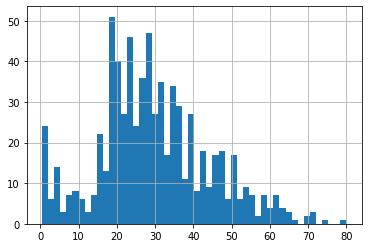

In [8]:
df.Age.hist(bins=50)

- In this we have to take far value

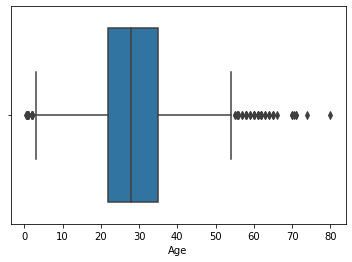

In [22]:
import seaborn as sns
sns.boxplot('Age', data = df)

# Have a look at outliers
#we have to terminate / replace them

In [9]:
# Get CENTRAL value which is mean(Bell Curve)
df.Age.mean()

29.69911764705882

In [16]:
# Get far value 
extreme = df.Age.mean() + 3 * df.Age.std()

In [17]:
def impute_nan(df, var, median, extreme):
    df[var + '_endDistribution'] = df[var].fillna(extreme)
    df[var].fillna(median, inplace=True)

In [18]:
median = df.Age.median()

In [19]:
impute_nan(df, 'Age', median, extreme)

In [21]:
df.head(10)

,Survived,Age,Fare,Age_endDistribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


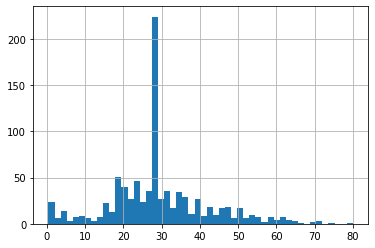

In [23]:
# All Nan value is replaced by median / Centre, large distortion
df.Age.hist(bins=50)

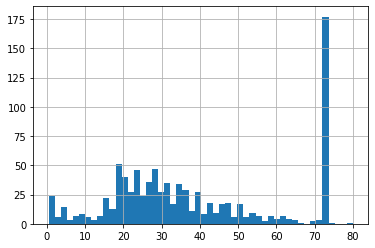

In [24]:
# As u can see all nan value is shifted to end and contains all outliers(THAT WE CAN SEE IN BOXPLOT) 
df.Age_endDistribution.hist(bins=50)

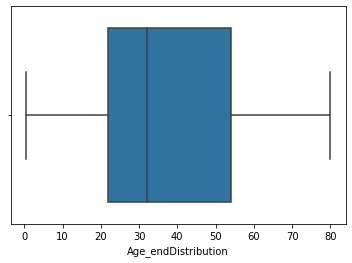

In [25]:
# notice NO OUTLIERS VALUE
sns.boxplot('Age_endDistribution', data=df)

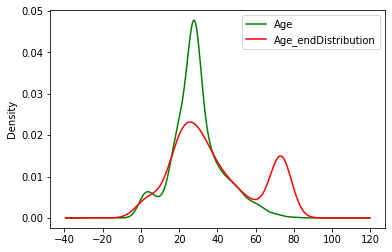

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
df.Age.plot(kind='kde', color='green', label='Age')
df.Age_endDistribution.plot(kind='kde', color='red', label='Age_endDistribution')
plt.legend()
plt.show()